## Exploratory Data Analysis and Modelling
### Predicting rainfall of North East region using linear regression
##### North East was chosen as it has the lowest rainfall on average out of all regions. This tool could be used to forecast total rainfall on a given month, to decide whether irrigation needs to be used that month. (Irrigating during high rainfall can lead to waterlogged soil and damage soil quality, impacting agriculture.)

In [2]:
#importing key libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import statsmodels.api as sm 
import statsmodels.tools 

In [3]:
#load in dataframe and clean/process

In [4]:
df = pd.read_csv("NE_hourly_data.csv")

In [5]:
df.head()

,date_time,total precipitation (mm),atmospheric pressure at station level (mb),atmospheric pressure max. in the previous hour (mb),atmospheric pressure min. in the previous hour (mb),air temperature - dry bulb (°c),dew point temperature (°c),max. temperature in the previous hour (°c),min. temperature in the previous hour (°c),dew temperature max. in the previous hour (°c),...,relative humidity max. in the previous hour (%),relative humidity min. in the previous hour (%),air relative humidity (%),wind direction (° (gr)),maximum wind gust (m/s),wind speed (m/s),latitude,longitude,height,region
0,2001-01-01 00:00:00,0.0,1007.0,1007.4,1006.5,25.9,21.3,26.1,25.8,21.6,...,77.0,76.0,76.0,53.0,8.0,2.7,-13.016667,-38.516667,51.41,NE
1,2001-01-01 01:00:00,0.0,1008.0,1007.6,1007.4,25.4,21.6,25.8,25.4,21.6,...,79.0,76.0,79.0,49.0,6.2,2.1,-13.016667,-38.516667,51.41,NE
2,2001-01-01 02:00:00,0.0,1007.0,1007.7,1007.4,25.1,21.9,25.4,25.1,21.9,...,83.0,79.0,83.0,42.0,4.7,1.7,-13.016667,-38.516667,51.41,NE
3,2001-01-01 03:00:00,0.0,1007.0,1007.5,1007.1,24.8,22.0,25.1,24.8,22.1,...,85.0,83.0,85.0,42.0,4.1,1.4,-13.016667,-38.516667,51.41,NE
4,2001-01-01 04:00:00,0.0,1007.0,1007.1,1006.6,24.7,21.6,24.9,24.7,22.0,...,85.0,83.0,83.0,42.0,4.9,1.7,-13.016667,-38.516667,51.41,NE


In [6]:
df.shape

(178200, 21)

In [7]:
#dropping irrelevant columns
df.drop(columns=['region', 'latitude', 'longitude','height'], inplace=True)

In [8]:
df.columns

Index(['date_time', 'total precipitation (mm)',
       'atmospheric pressure at station level (mb)',
       'atmospheric pressure max. in the previous hour (mb)',
       'atmospheric pressure min. in the previous hour (mb)',
       'air temperature - dry bulb (°c)', 'dew point temperature (°c)',
       'max. temperature in the previous hour (°c)',
       'min. temperature in the previous hour (°c)',
       'dew temperature max. in the previous hour (°c)',
       'dew temperature min. in the previous hour (°c)',
       'relative humidity max. in the previous hour (%)',
       'relative humidity min. in the previous hour (%)',
       'air relative humidity (%)', 'wind direction (° (gr))',
       'maximum wind gust (m/s)', 'wind speed (m/s)'],
      dtype='object')

In [9]:
#checking for and dropping nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178200 entries, 0 to 178199
Data columns (total 17 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   date_time                                            178200 non-null  object 
 1   total precipitation (mm)                             177388 non-null  float64
 2   atmospheric pressure at station level (mb)           177388 non-null  float64
 3   atmospheric pressure max. in the previous hour (mb)  177388 non-null  float64
 4   atmospheric pressure min. in the previous hour (mb)  177388 non-null  float64
 5   air temperature - dry bulb (°c)                      177388 non-null  float64
 6   dew point temperature (°c)                           177388 non-null  float64
 7   max. temperature in the previous hour (°c)           177388 non-null  float64
 8   min. temperature in the previous hour (°c)           1

In [19]:
#dropping nulls/outliers
for i in list(df.columns):
    df = df.loc[df[i] != -9999]

In [10]:
df.shape

(178200, 17)

In [10]:
df.tail()

,date_time,total precipitation (mm),atmospheric pressure at station level (mb),atmospheric pressure max. in the previous hour (mb),atmospheric pressure min. in the previous hour (mb),air temperature - dry bulb (°c),dew point temperature (°c),max. temperature in the previous hour (°c),min. temperature in the previous hour (°c),dew temperature max. in the previous hour (°c),dew temperature min. in the previous hour (°c),relative humidity max. in the previous hour (%),relative humidity min. in the previous hour (%),air relative humidity (%),wind direction (° (gr)),maximum wind gust (m/s),wind speed (m/s)
178195,2021-04-30 19:00:00,0.050794,975.587302,975.679365,975.352381,28.085714,19.880952,29.282540,27.760317,20.441270,19.100000,65.190476,58.126984,63.460317,146.761905,7.274603,2.926984
178196,2021-04-30 20:00:00,0.235484,975.209677,975.217742,974.864516,26.893548,19.825806,28.272581,26.795161,20.393548,19.250000,68.822581,61.838710,67.677419,150.612903,6.832258,2.603226
178197,2021-04-30 21:00:00,0.064286,975.035714,975.001786,974.603571,25.755357,20.008929,26.983929,25.707143,20.282143,19.491071,73.232143,67.089286,72.910714,145.928571,5.719643,2.062500
178198,2021-04-30 22:00:00,0.076364,975.472727,975.381818,974.796364,25.074545,19.994545,25.858182,25.001818,20.236364,19.661818,76.327273,71.745455,75.854545,146.236364,4.921818,1.918182
178199,2021-04-30 23:00:00,0.025455,976.018182,975.974545,975.356364,24.460000,20.007273,25.154545,24.321818,20.334545,19.698182,79.127273,75.109091,78.381818,139.945455,5.165455,2.007273


In [11]:
df.loc[df['total precipitation (mm)'].idxmin()]

date_time                                              2001-01-01 00:00:00
total precipitation (mm)                                               0.0
atmospheric pressure at station level (mb)                          1007.0
atmospheric pressure max. in the previous hour (mb)                 1007.4
atmospheric pressure min. in the previous hour (mb)                 1006.5
air temperature - dry bulb (°c)                                       25.9
dew point temperature (°c)                                            21.3
max. temperature in the previous hour (°c)                            26.1
min. temperature in the previous hour (°c)                            25.8
dew temperature max. in the previous hour (°c)                        21.6
dew temperature min. in the previous hour (°c)                        21.3
relative humidity max. in the previous hour (%)                       77.0
relative humidity min. in the previous hour (%)                       76.0
air relative humidity (%)

### Summing rainfall per month

In [11]:
df2 = df.copy()

In [12]:
df2['date_time'] = pd.to_datetime(df2['date_time'])

In [15]:
#grouping by month - summing rainfall, taking mean of features
dfr = df2.resample(rule='M', on='date_time').agg({'total precipitation (mm)':'sum', 'atmospheric pressure at station level (mb)':'mean',  
'atmospheric pressure max. in the previous hour (mb)':'mean', 
'atmospheric pressure min. in the previous hour (mb)':'mean', 
'air temperature - dry bulb (°c)':'mean',                                      
'dew point temperature (°c)':'mean',                                           
'max. temperature in the previous hour (°c)':'mean',                            
'min. temperature in the previous hour (°c)':'mean',                          
'dew temperature max. in the previous hour (°c)':'mean',                    
'dew temperature min. in the previous hour (°c)':'mean',                     
'relative humidity max. in the previous hour (%)':'mean',                    
'relative humidity min. in the previous hour (%)':'mean',              
'air relative humidity (%)':'mean',                               
'wind direction (° (gr))':'mean',                                               
'maximum wind gust (m/s)':'mean',                                                
'wind speed (m/s)':'mean'})                        
dfr.head()

,total precipitation (mm),atmospheric pressure at station level (mb),atmospheric pressure max. in the previous hour (mb),atmospheric pressure min. in the previous hour (mb),air temperature - dry bulb (°c),dew point temperature (°c),max. temperature in the previous hour (°c),min. temperature in the previous hour (°c),dew temperature max. in the previous hour (°c),dew temperature min. in the previous hour (°c),relative humidity max. in the previous hour (%),relative humidity min. in the previous hour (%),air relative humidity (%),wind direction (° (gr)),maximum wind gust (m/s),wind speed (m/s)
date_time,,,,,,,,,,,,,,,,
2001-01-31,98.8,1008.243280,1008.398387,1007.994355,26.275403,21.638441,26.717742,25.870699,22.095565,21.223925,78.297043,73.782258,76.125000,101.556452,5.444758,1.854704
2001-02-28,30.4,1006.471726,1006.617113,1006.188690,27.196280,22.168452,27.669345,26.751042,22.566518,21.813839,76.854167,72.260417,74.577381,103.063988,5.525298,1.931101
2001-03-31,263.6,1007.207232,1007.383032,1006.927538,26.649930,22.534353,27.097636,26.234492,22.958275,22.139638,80.762170,76.421419,78.674548,114.079277,4.904451,1.623088
2001-04-30,109.8,1008.280556,1008.436528,1008.006667,26.418056,21.841389,26.888750,25.933889,22.322639,21.373333,78.943056,73.616667,76.290278,122.845833,5.208194,1.777361
2001-05-31,208.0,1008.143243,1008.310946,1007.875676,25.830135,22.255405,26.269189,25.398784,22.670000,21.875405,83.260811,78.743243,81.044595,125.660811,5.027432,1.730541


In [16]:
dfr.isna().sum()

total precipitation (mm)                               0
atmospheric pressure at station level (mb)             0
atmospheric pressure max. in the previous hour (mb)    0
atmospheric pressure min. in the previous hour (mb)    0
air temperature - dry bulb (°c)                        0
dew point temperature (°c)                             0
max. temperature in the previous hour (°c)             0
min. temperature in the previous hour (°c)             0
dew temperature max. in the previous hour (°c)         0
dew temperature min. in the previous hour (°c)         0
relative humidity max. in the previous hour (%)        0
relative humidity min. in the previous hour (%)        0
air relative humidity (%)                              0
wind direction (° (gr))                                0
maximum wind gust (m/s)                                0
wind speed (m/s)                                       0
dtype: int64

In [41]:
dfr.dropna(inplace=True)

## EDA

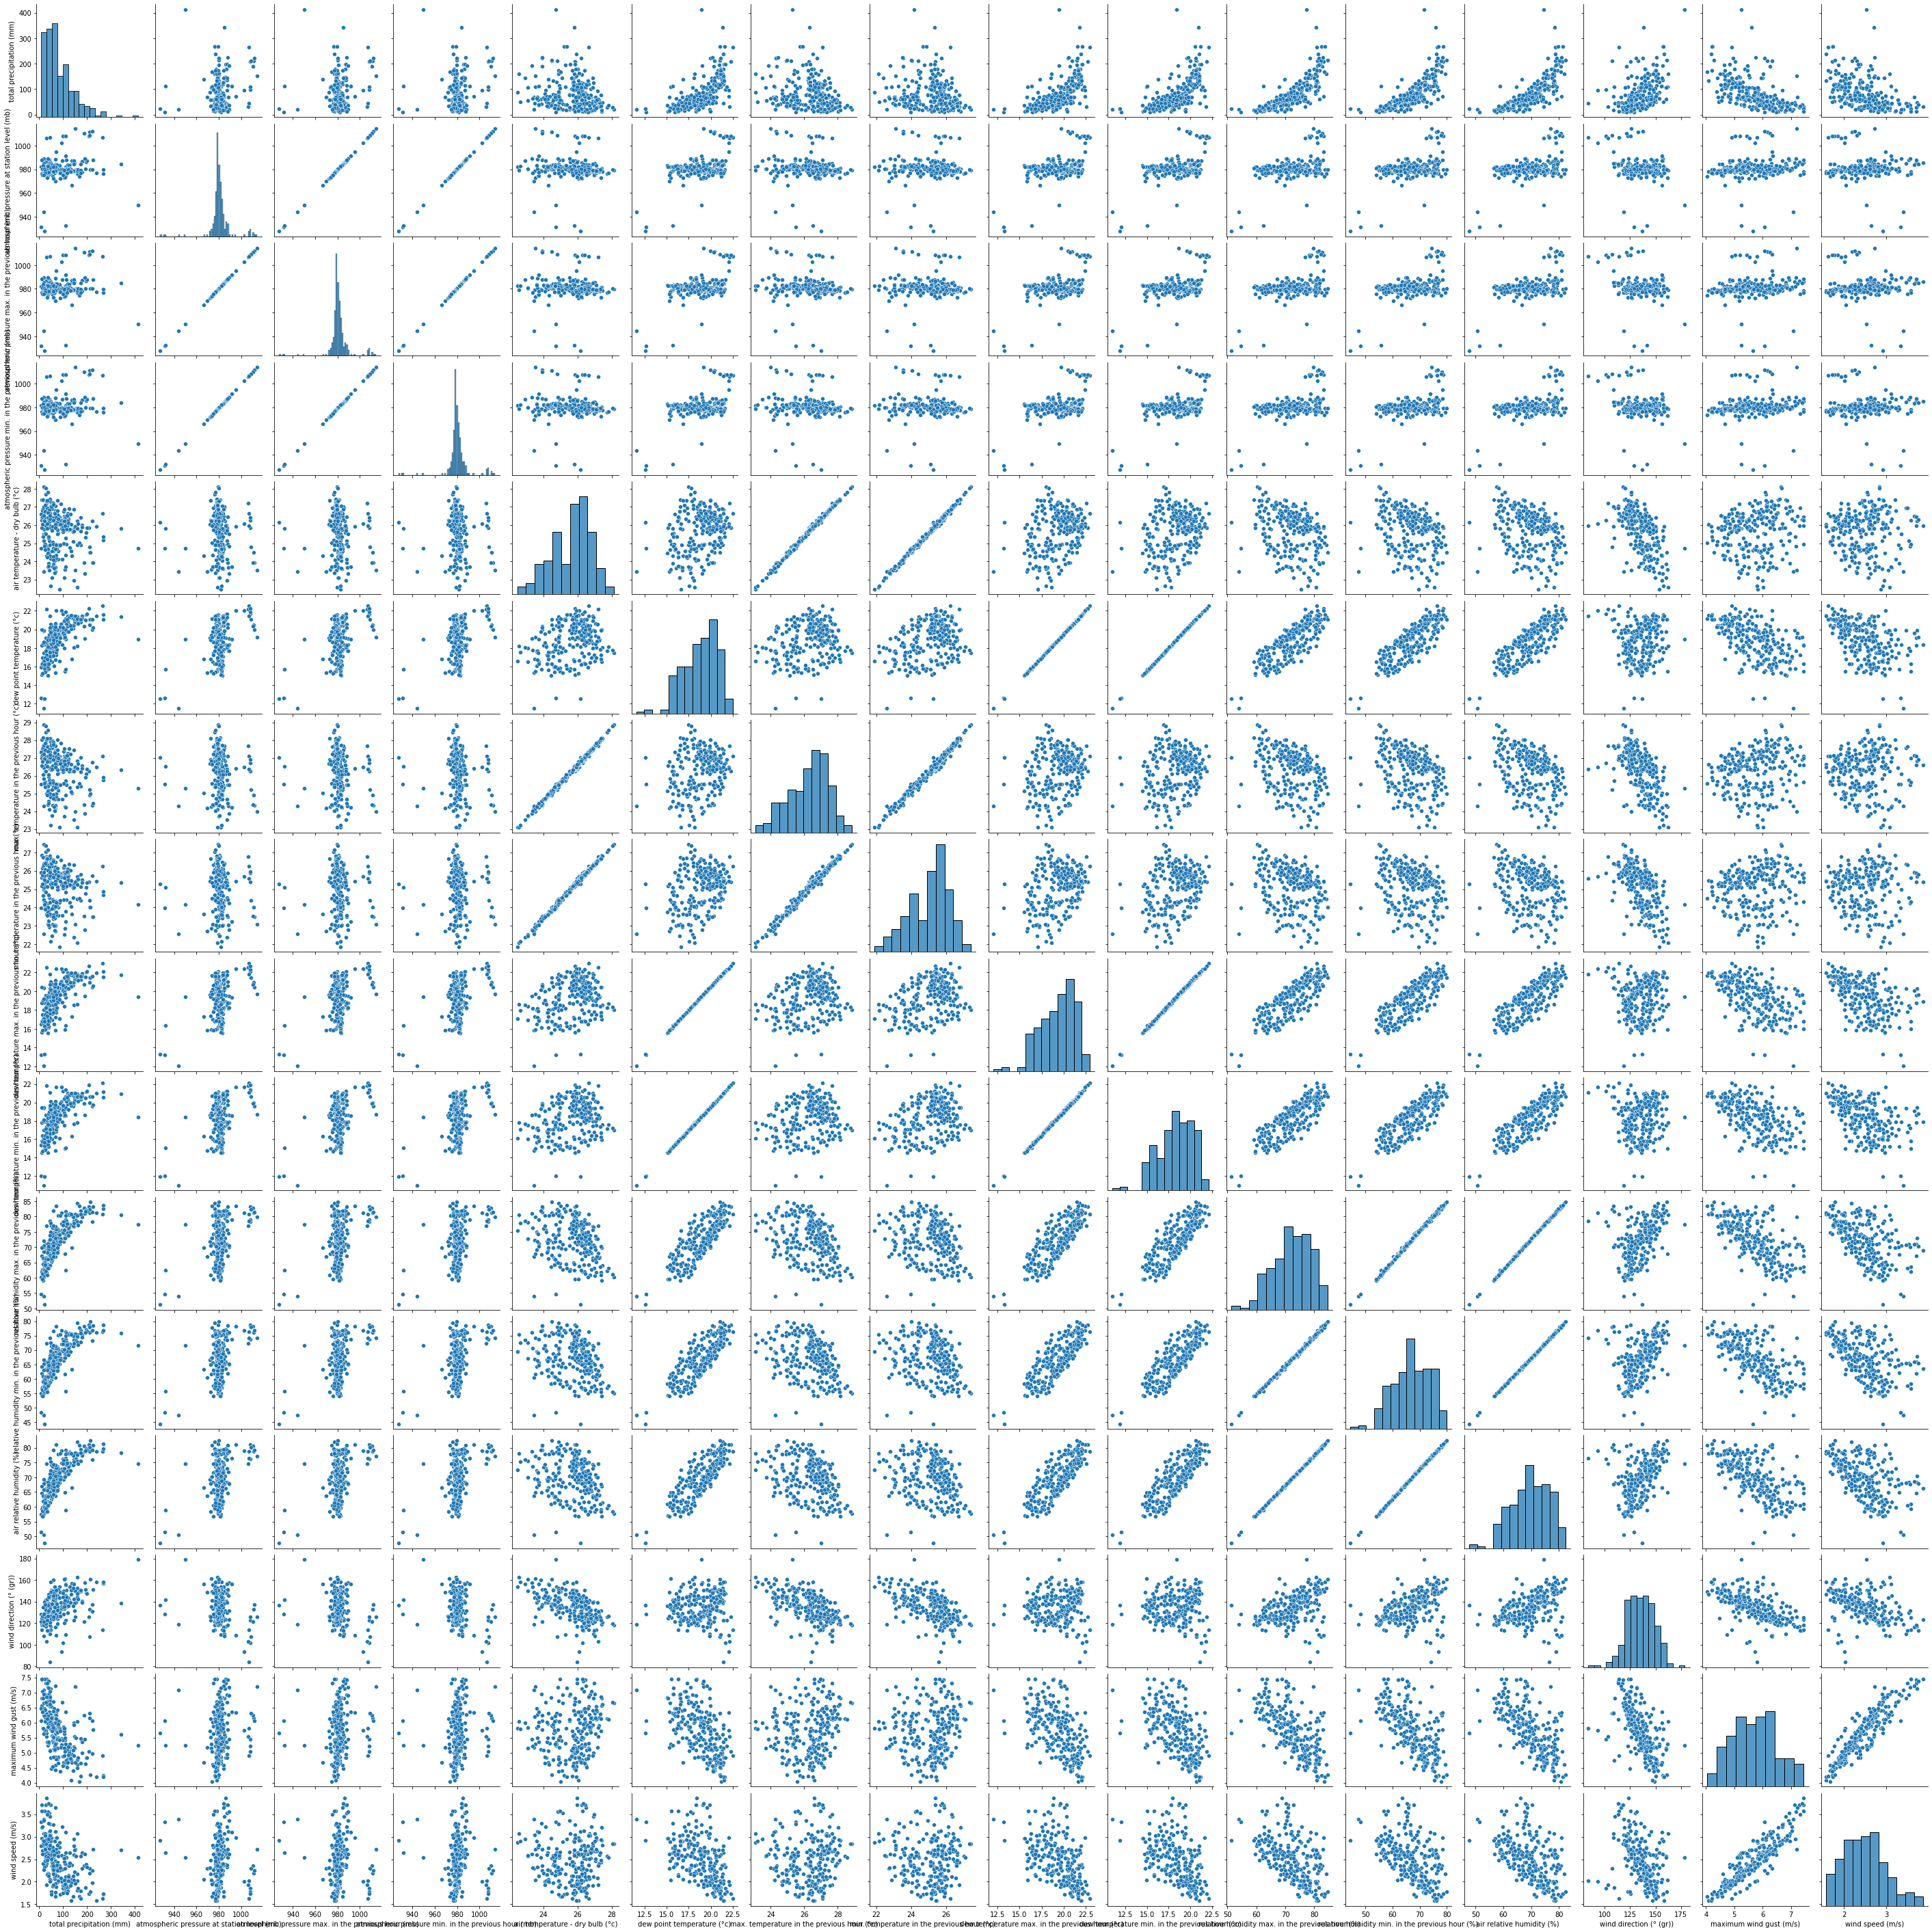

In [40]:
#checking nature of relationships between target and features
sns.pairplot(dfr)
plt.show()

 notes:
    
   - temperature, humidity and wind factors may need logarithmic scaling
   - robust scaling for rest



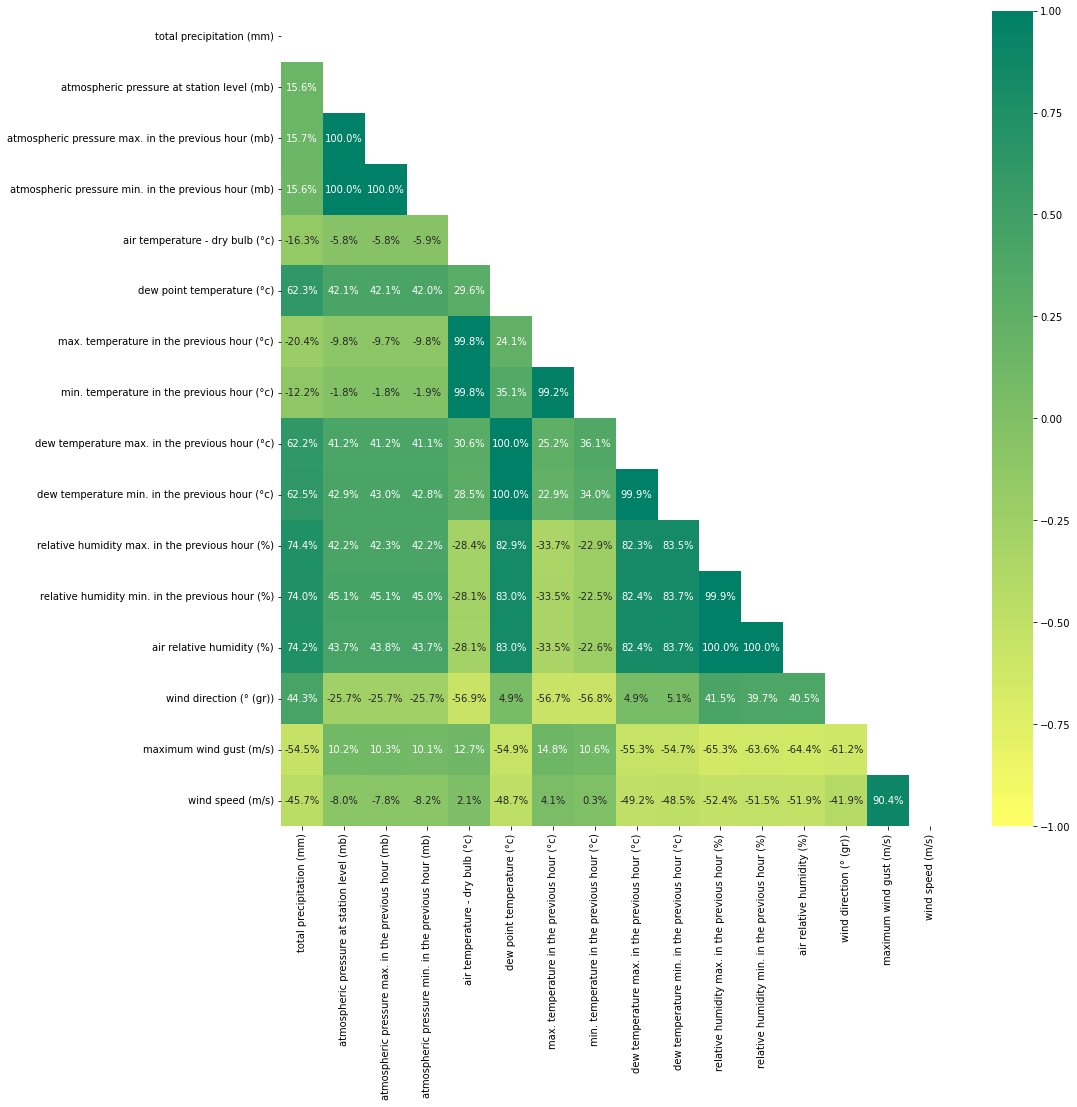

In [20]:
#checking for linear relationships between features and target
import matplotlib.pyplot as plt
plt.figure(figsize = (15,15))
sns.heatmap(dfr.corr(),
           annot = True,  
           cmap = 'summer_r',
           fmt = '.1%', 
           vmin = -1, 
           vmax = 1,
           mask = np.triu(dfr.corr()) )
plt.show()

### notes:

* strong positive correlations between precipitation and humidity
* moderate positive correlation with dew point temperature and wind direction

In [21]:
df.columns

Index(['date_time', 'total precipitation (mm)',
       'atmospheric pressure at station level (mb)',
       'atmospheric pressure max. in the previous hour (mb)',
       'atmospheric pressure min. in the previous hour (mb)',
       'air temperature - dry bulb (°c)', 'dew point temperature (°c)',
       'max. temperature in the previous hour (°c)',
       'min. temperature in the previous hour (°c)',
       'dew temperature max. in the previous hour (°c)',
       'dew temperature min. in the previous hour (°c)',
       'relative humidity max. in the previous hour (%)',
       'relative humidity min. in the previous hour (%)',
       'air relative humidity (%)', 'wind direction (° (gr))',
       'maximum wind gust (m/s)', 'wind speed (m/s)'],
      dtype='object')

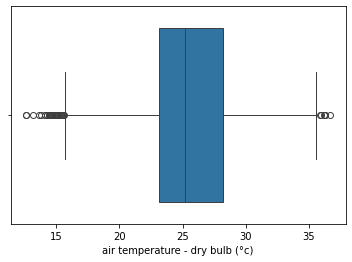

In [22]:
import seaborn as sns
sns.boxplot(data=df['air temperature - dry bulb (°c)'], orient='h')
plt.show()

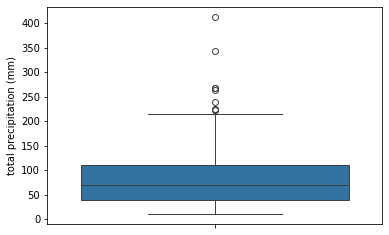

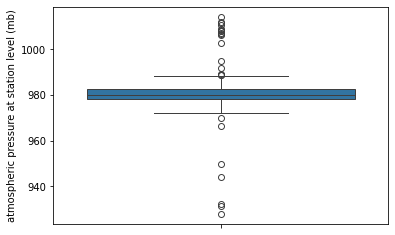

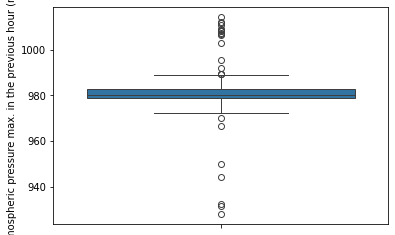

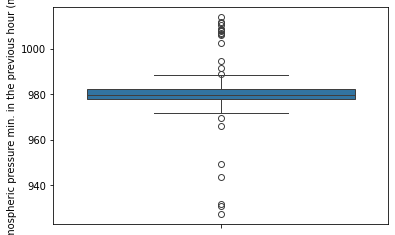

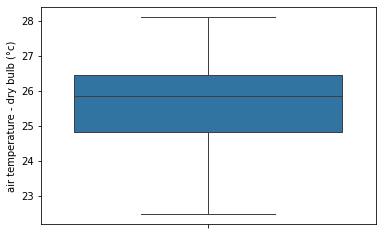

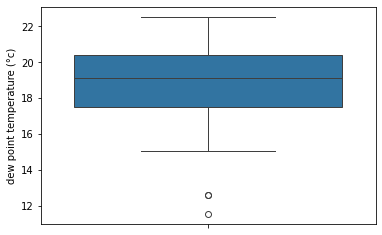

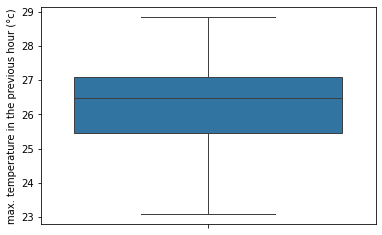

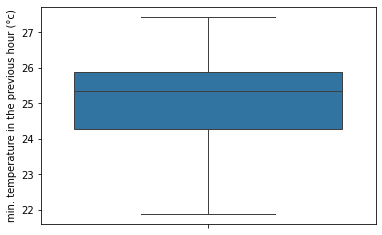

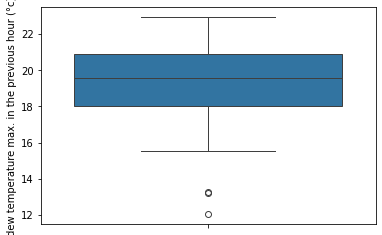

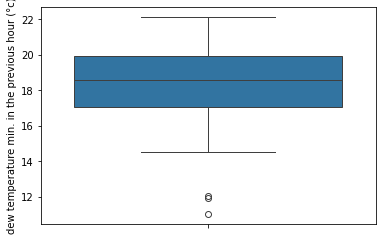

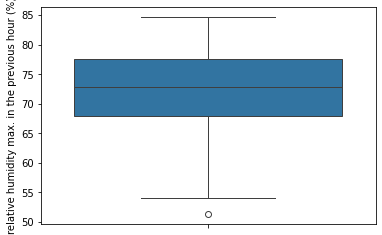

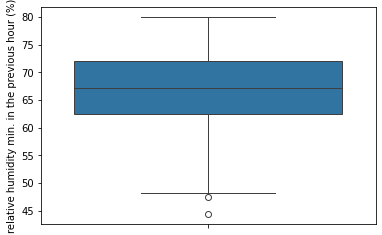

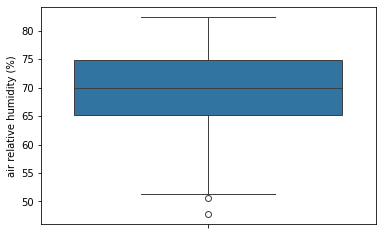

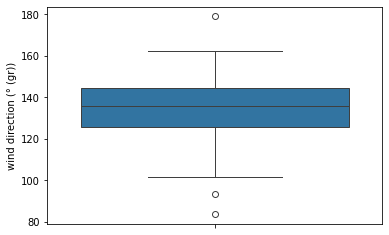

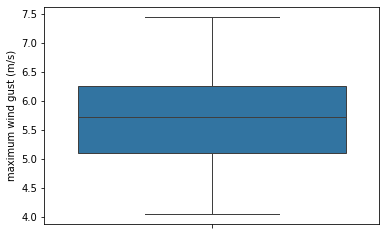

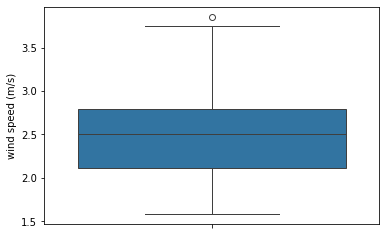

In [23]:
#visualising distributions of each feature to check for outliers and need for scaling.
import seaborn as sns

numeric = list(dfr.columns)

for i in numeric:
        sns.boxplot(dfr[i])
        #plt.xlabel(df[i])
        plt.show()

## notes: all distributions look good
* outlier removal/scaling needed for atmospheric pressure

## Modelling - Linear Regression

In [24]:
df.dtypes

date_time                                               object
total precipitation (mm)                               float64
atmospheric pressure at station level (mb)             float64
atmospheric pressure max. in the previous hour (mb)    float64
atmospheric pressure min. in the previous hour (mb)    float64
air temperature - dry bulb (°c)                        float64
dew point temperature (°c)                             float64
max. temperature in the previous hour (°c)             float64
min. temperature in the previous hour (°c)             float64
dew temperature max. in the previous hour (°c)         float64
dew temperature min. in the previous hour (°c)         float64
relative humidity max. in the previous hour (%)        float64
relative humidity min. in the previous hour (%)        float64
air relative humidity (%)                              float64
wind direction (° (gr))                                float64
maximum wind gust (m/s)                                

In [3]:
#removing target and date time from features column
fe_cols = list(dfr.columns)
fe_cols.remove('total precipitation (mm)')
fe_cols.remove('date_time')

In [54]:
# X = features, Y = target

X = dfr[fe_cols]

Y = dfr['total precipitation (mm)']

## Feature Engineering

In [90]:
#logarithmic scaling of relevant features and adding constant
def feature_eng(df):
    df = df.copy()
    df['dew point temperature (°c)'] = np.log(df['dew point temperature (°c)'])
    df['dew temperature max. in the previous hour (°c)'] = np.log(df['dew temperature max. in the previous hour (°c)'])
    df['dew temperature min. in the previous hour (°c)'] = np.log(df['dew temperature min. in the previous hour (°c)'])
    df['relative humidity max. in the previous hour (%)'] = np.log(df['relative humidity max. in the previous hour (%)'])
    df['relative humidity min. in the previous hour (%)'] = np.log(df['relative humidity min. in the previous hour (%)'])
    df['air relative humidity (%)'] = np.log(df['air relative humidity (%)'])
    df = sm.add_constant(df)
    
    return df

In [92]:
#splitting training and testing dataset in 80:20 split, setting random state.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [93]:
#applying feature engineering and ensuring length of X train (feature values) is the same as y train (target values)
X_train_fe = feature_eng(X_train)
X_train = y_train.loc[X_train_fe.index]

In [94]:
#applying feature engineering and ensuring length of X test (feature values) is the same as y test (target values)
X_test_fe = feature_eng(X_test)
X_test = y_test.loc[X_test_fe.index]

In [95]:
#fitting onto ordinary least squares regression
feature_cols_main = list(X_train_fe.columns)

lin_reg = sm.OLS(y_train, X_train_fe[feature_cols_main])
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     total precipitation (mm)   R-squared:                       0.607
Model:                                  OLS   Adj. R-squared:                  0.603
Method:                       Least Squares   F-statistic:                     148.1
Date:                      Sun, 03 Aug 2025   Prob (F-statistic):           1.24e-39
Time:                              20:58:36   Log-Likelihood:                -995.14
No. Observations:                       195   AIC:                             1996.
Df Residuals:                           192   BIC:                             2006.
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
const                                                 861.3265    308.650      2.791      0.006     252.546    1470.107
relative humidity max. in the previous hour (%)         8.1285      0.478     16.992      0.000       7.185       9.072
atmospheric pressure min. in the previous hour (mb)    -1.3914      0.327     -4.253      0.000      -2.037      -0.746
==============================================================================
Omnibus:                      112.568   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              893.479
Skew:                           2.065   Prob(JB):                    9.63e-195
Kurtosis:                      12.639   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Notes:

* starting stats:
    * R-squared: 0.77
    * AIC: 1915.
    * BIC: 1968
    * Omnibus:	86.514
    * Durbin-Watson: 2.038
    * Cond. No.	9.96e+05
    * Kurtosis:	11.755


* logging all relevant features:
    * R-squared: 0.79
    * AIC: 1897.
    * BIC: -667.9
    * Omnibus:	77.9
    * Durbin-Watson: 1.946
    * Kurtosis: 10.88
    * Cond. No.	2.25e+07
    
 notes: increased R^2, decreased AIC+BIC, decreased everthing except conditional number, which has increased exponentially.

* stepwise regression feature selection:
    * R-squared: 0.584
    * AIC: 2007
    * BIC: 2017
    * Omnibus: 108.42	
    * Durbin-Watson: 2.026
    * Kurtosis: 11.69
    * Cond. No.	1.01e+05

    
 notes: signficiant decrease in R^2, increased AIC+BIC, decreased conditional number, significant increase in omnibus

## Predictions and RMSE

In [96]:
y_test_pred = results.predict(X_test_fe)

In [97]:
#calculates the RMSE for the test data
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
#print out the RMSE
print(rmse)

39.47991006301603


In [98]:
#calculates the MAE for the test data
mae = statsmodels.tools.eval_measures.meanabs(y_test, y_test_pred)
#print out the MAE
print(mae)

31.124964307234404


### notes:

* starting stats:
    * RMSE: 44.28mm
    * MAE: 29.01mm
* post logging all relevant:
    * RMSE: 40.60mm
    * MAE: 27.4mm
* post stepwisae:
    * RMSE: 39.48mm
    * MAE:31.12mm

## Model Refinement

### Feature Selection

In [51]:
def stepwise_selection(X, y, threshold_in = 0.01, threshold_out = 0.05, verbose = True):
    # The function is checking for p-values (whether features are statistically significant) - lower is better
    included = [] # this is going to be the list of features we keep
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index = excluded, dtype = 'float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        # we add the feature with the lowest (best) p-value under the threshold to our 'included' list
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval)) # specifying the verbose text


        # backward step: removing features if new features added to the list make them statistically insignificant
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        # if the p-value exceeds the upper threshold, the feature will be dropped from the 'included' list
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [52]:
result = stepwise_selection(X_train_fe[['atmospheric pressure at station level (mb)', 'atmospheric pressure max. in the previous hour (mb)', 'atmospheric pressure min. in the previous hour (mb)', 'air temperature - dry bulb (°c)', 'dew point temperature (°c)', 'max. temperature in the previous hour (°c)', 'min. temperature in the previous hour (°c)', 'dew temperature max. in the previous hour (°c)', 'dew temperature min. in the previous hour (°c)', 'relative humidity max. in the previous hour (%)', 'relative humidity min. in the previous hour (%)', 'air relative humidity (%)', 'wind direction (° (gr))', 'maximum wind gust (m/s)', 'wind speed (m/s)']], y_train)

print('resulting features:')
print(result)

Add  relative humidity max. in the previous hour (%) with p-value 8.7177e-35
Add  atmospheric pressure min. in the previous hour (mb) with p-value 3.29284e-05
resulting features:
['relative humidity max. in the previous hour (%)', 'atmospheric pressure min. in the previous hour (mb)']
